In [1]:
from google.colab import files
uploaded = files.upload()


Saving Customer.csv to Customer.csv
Saving prod_cat_info.csv to prod_cat_info.csv
Saving Transactions.csv to Transactions.csv


In [2]:
import pandas as pd

# Read the CSV files into pandas DataFrames
customers = pd.read_csv('Customer.csv')
transactions = pd.read_csv('Transactions.csv')
product_hierarchy = pd.read_csv('prod_cat_info.csv')

# Merging the datasets: Customers, Product Hierarchy, and Transactions as Customer_Final
customer_final = pd.merge(customers, transactions, left_on='customer_Id', right_on='cust_id', how='outer')
customer_final = pd.merge(customer_final, product_hierarchy, on='prod_cat_code', how='left')


In [3]:
customer_final


,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,7.0,Fiction
1,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,12.0,Academic
2,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,10.0,Non-Fiction
3,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,11.0,Children
4,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,3.0,Comics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99429,274308,29-12-1992,F,5.0,5.816054e+10,274308.0,4/7/2012,12.0,5.0,5.0,588.0,308.700,3248.700,e-Shop,Books,12.0,Academic
99430,274308,29-12-1992,F,5.0,5.816054e+10,274308.0,4/7/2012,12.0,5.0,5.0,588.0,308.700,3248.700,e-Shop,Books,10.0,Non-Fiction
99431,274308,29-12-1992,F,5.0,5.816054e+10,274308.0,4/7/2012,12.0,5.0,5.0,588.0,308.700,3248.700,e-Shop,Books,11.0,Children
99432,274308,29-12-1992,F,5.0,5.816054e+10,274308.0,4/7/2012,12.0,5.0,5.0,588.0,308.700,3248.700,e-Shop,Books,3.0,Comics


In [4]:
#1) a. Get column names and their corresponding data types
column_data_types = customer_final.dtypes

# b. Top 10 observations
top_10_obs = customer_final.head(10)

# c. Five-number summary for continuous variables
five_num_summary = customer_final.describe()

# d. Frequency tables for all categorical variables
frequency_tables = {}
categorical_cols = customer_final.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    frequency_tables[col] = customer_final[col].value_counts()

# Displaying the summary report
print("Column names and data types:")
print(column_data_types)
print("\nTop 10 observations:")
print(top_10_obs)
print("\nFive-number summary:")
print(five_num_summary)
print("\nFrequency tables for categorical variables:")
for col, freq_table in frequency_tables.items():
    print(f"\n{col}:")
    print(freq_table)


Column names and data types:
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id       float64
cust_id              float64
tran_date             object
prod_subcat_code     float64
prod_cat_code        float64
Qty                  float64
Rate                 float64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code    float64
prod_subcat           object
dtype: object

Top 10 observations:
   customer_Id         DOB Gender  city_code  transaction_id   cust_id  \
0       268408  02-01-1970      M        4.0    8.724384e+10  268408.0   
1       268408  02-01-1970      M        4.0    8.724384e+10  268408.0   
2       268408  02-01-1970      M        4.0    8.724384e+10  268408.0   
3       268408  02-01-1970      M        4.0    8.724384e+10  268408.0   
4       268408  02-01-1970      M        4.0    8.724384e+10  268408.0  

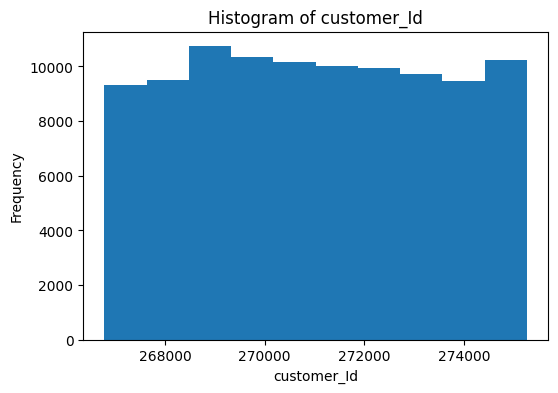

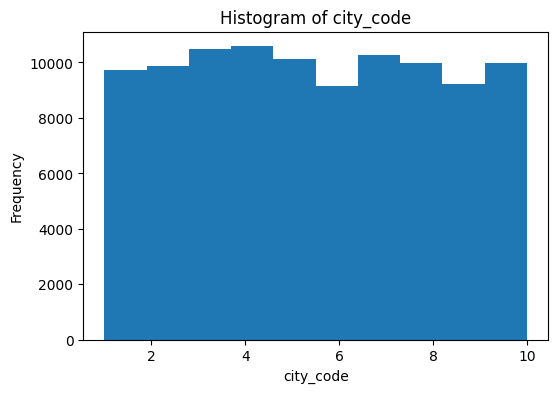

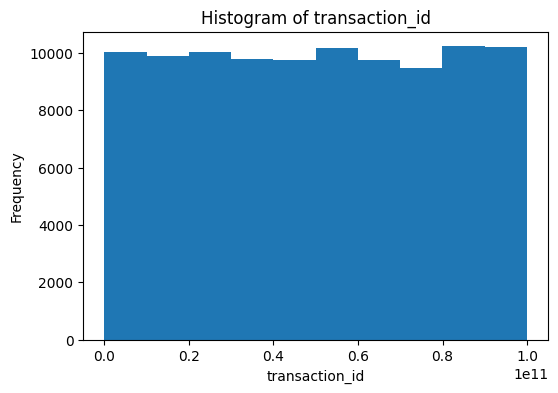

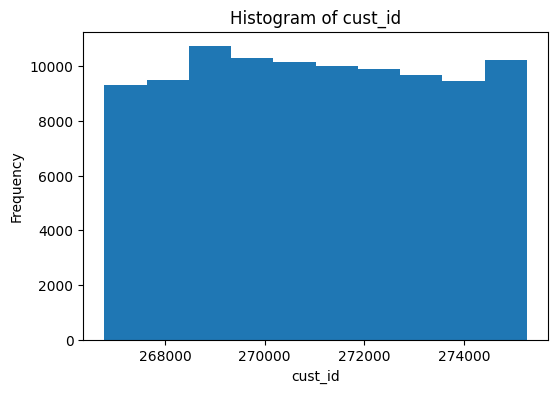

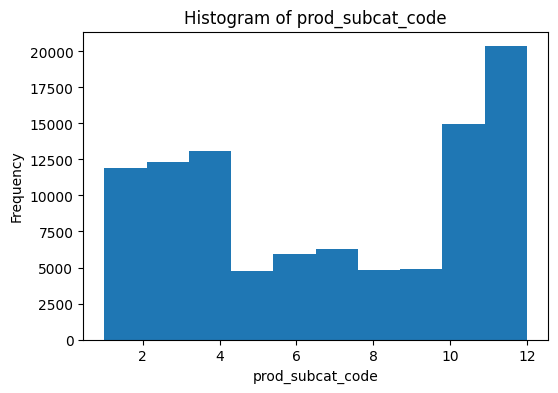

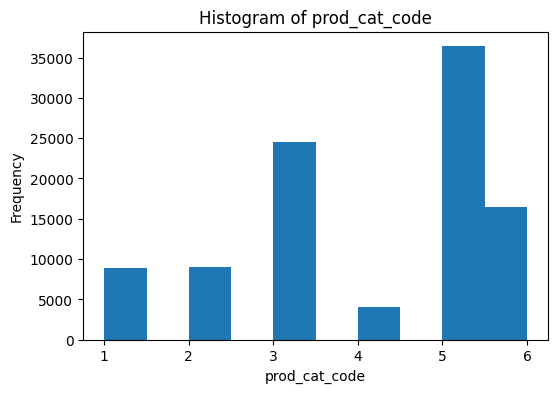

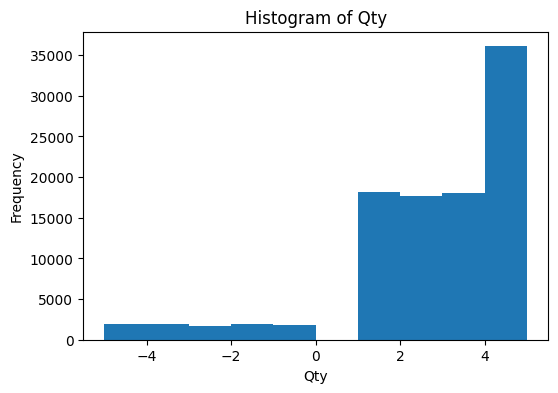

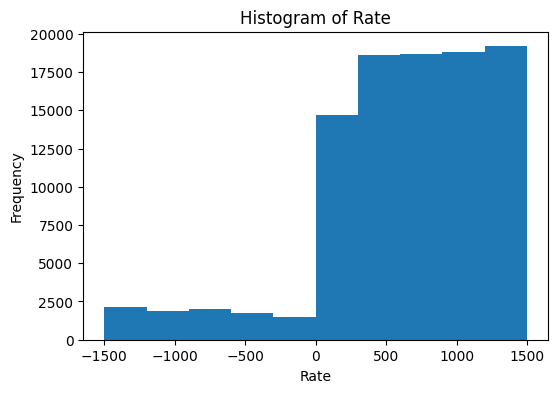

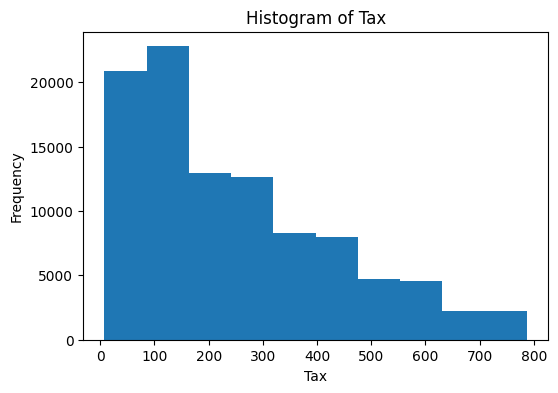

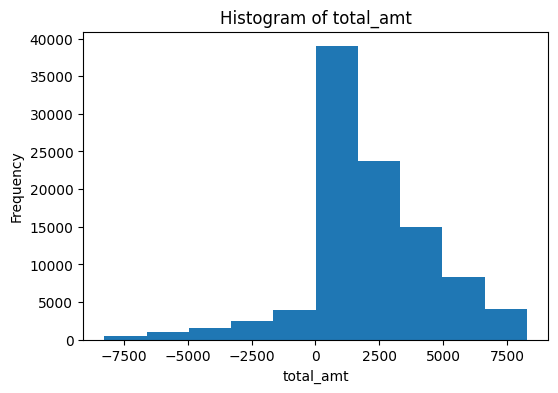

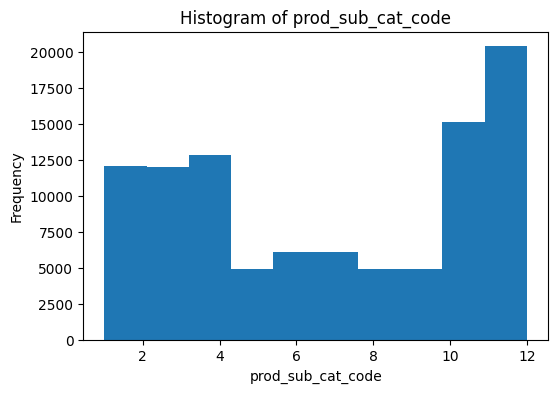

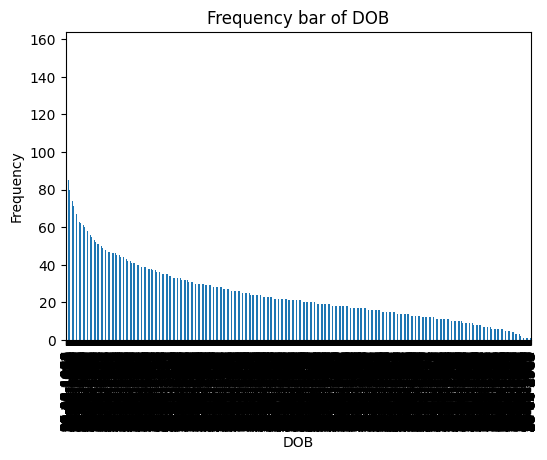

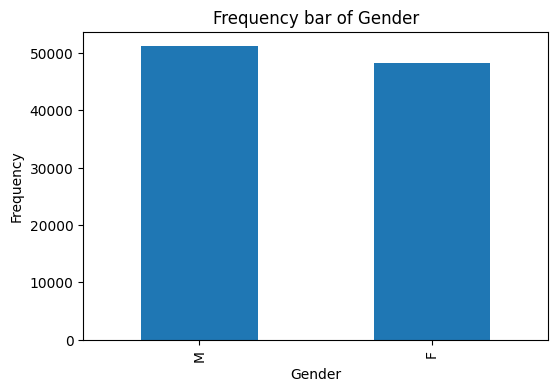

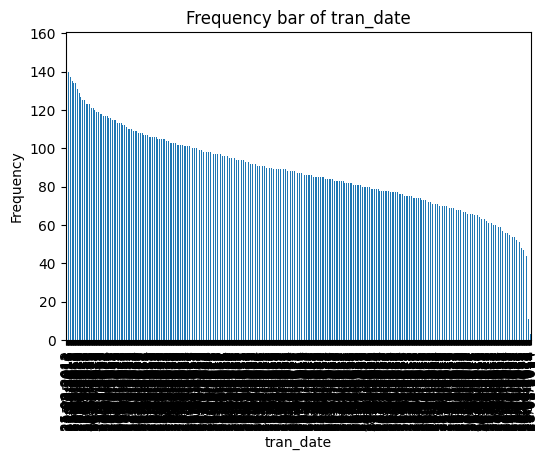

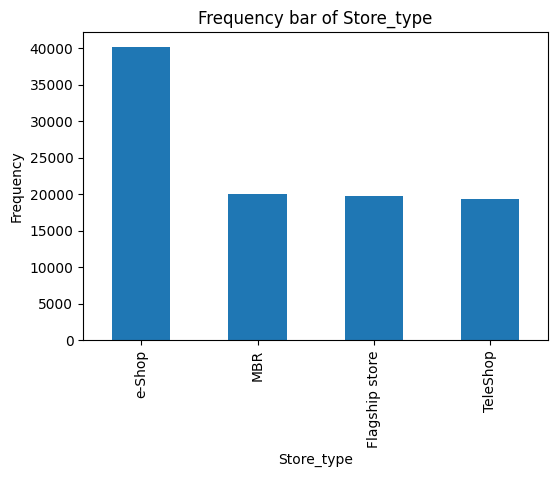

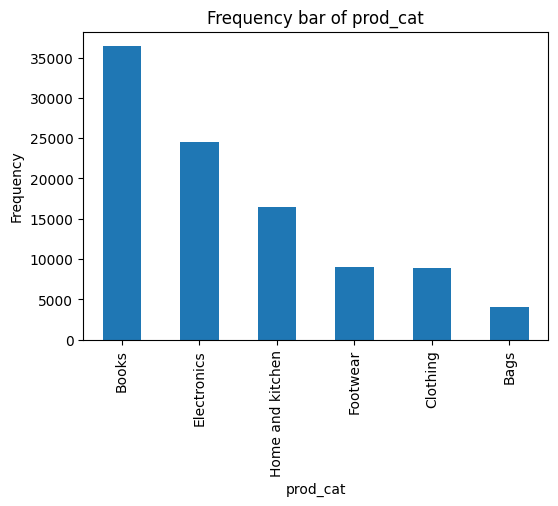

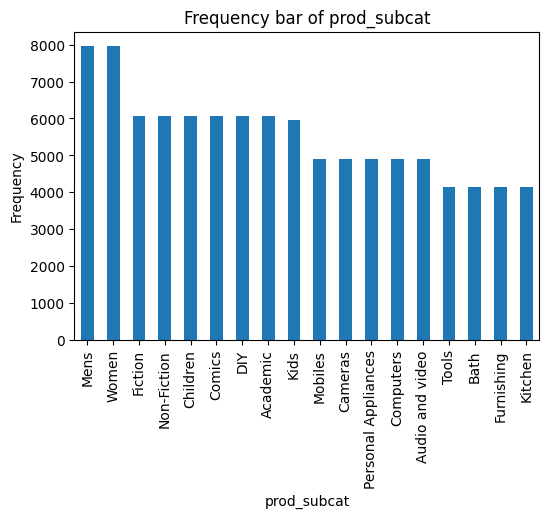

In [5]:
# Generate histograms for continuous variables and frequency bars for categorical variables
import matplotlib.pyplot as plt

continuous_cols = customer_final.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in continuous_cols:
    plt.figure(figsize=(6, 4))
    customer_final[col].plot(kind='hist', bins=10)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    customer_final[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency bar of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [17]:
# 4. Calculate the following information using the merged dataset:

# a. Time period of the available transaction data
import pandas as pd

# Assuming 'tran_date' is the date column in your DataFrame
customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'], errors='coerce', format='%d-%m-%y')

# Check for any rows with NaT (Not a Time) values after conversion
invalid_dates = customer_final['tran_date'].isna()
if invalid_dates.any():
    print("Invalid date values found. Investigate and handle them.")

# Check the time period again
time_period = customer_final['tran_date'].min(), customer_final['tran_date'].max()
print("Time period of available transaction data:", time_period)


Invalid date values found. Investigate and handle them.
Time period of available transaction data: (NaT, NaT)


In [9]:
# 4) b. Count of transactions where the total amount of transaction was negative
negative_transactions_count = customer_final[customer_final['total_amt'] < 0]['tran_date'].count()
print("Count of transactions with negative total amount:", negative_transactions_count)

Count of transactions with negative total amount: 9294


In [10]:
# 5. Analyze which product categories are more popular among females vs male customers.

product_popularity_by_gender = customer_final.groupby(['Gender', 'prod_cat'])['transaction_id'].count()
print("Product categories popularity among females vs males:")
print(product_popularity_by_gender)

Product categories popularity among females vs males:
Gender  prod_cat        
F       Bags                 1988
        Books               17694
        Clothing             4317
        Electronics         11640
        Footwear             4587
        Home and kitchen     7976
M       Bags                 2008
        Books               18696
        Clothing             4554
        Electronics         12850
        Footwear             4407
        Home and kitchen     8536
Name: transaction_id, dtype: int64


In [11]:
# 6. Which City code has the maximum customers and what was the percentage of customers from that city?

max_customers_city = customer_final['city_code'].value_counts().idxmax()
percentage_customers = (customer_final['city_code'].value_counts().max() / len(customer_final)) * 100
print("City code with the maximum customers:", max_customers_city)
print("Percentage of customers from that city:", percentage_customers)


City code with the maximum customers: 4.0
Percentage of customers from that city: 10.644246434821088


In [12]:
# 7. Which store type sells the maximum products by value and by quantity?

store_type_value = customer_final.groupby('Store_type')['total_amt'].sum().idxmax()
store_type_quantity = customer_final.groupby('Store_type')['Qty'].sum().idxmax()
print("Store type selling maximum products by value:", store_type_value)
print("Store type selling maximum products by quantity:", store_type_quantity)

Store type selling maximum products by value: e-Shop
Store type selling maximum products by quantity: e-Shop


In [13]:
# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

total_amount_flagship = customer_final[(customer_final['Store_type'] == 'Flagship store') &
                                      (customer_final['prod_cat'].isin(['Electronics', 'Clothing']))]['total_amt'].sum()
print("Total amount earned from Electronics and Clothing categories from Flagship Stores:", total_amount_flagship)

Total amount earned from Electronics and Clothing categories from Flagship Stores: 14658949.89


In [14]:
# 9. What was the total amount earned from "Male" customers under the "Electronics" category?

total_amount_male_electronics = customer_final[(customer_final['Gender'] == 'M') &
                                               (customer_final['prod_cat'] == 'Electronics')]['total_amt'].sum()
print("Total amount earned from Male customers under Electronics category:", total_amount_male_electronics)

Total amount earned from Male customers under Electronics category: 28515547.125


In [15]:
# 10. How many customers have more than 10 unique transactions, after removing all transactions with any negative amounts?

customers_positive_transactions = customer_final[customer_final['total_amt'] >= 0]
customers_unique_transactions = customers_positive_transactions.groupby('cust_id')['transaction_id'].nunique()
customers_more_than_10_transactions = len(customers_unique_transactions[customers_unique_transactions > 10])
print("Number of customers with more than 10 unique transactions:", customers_more_than_10_transactions)


Number of customers with more than 10 unique transactions: 6


In [16]:
import pandas as pd
from datetime import datetime

# Convert 'DOB' column to datetime if it's not in datetime format
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'])

current_date = datetime.now()
customer_final['Age'] = (current_date - customer_final['DOB']).astype('<m8[Y]')  # Calculate age in years

#11) Filter customers aged between 25 and 35
customers_age_25_to_35 = customer_final[(customer_final['Age'] >= 25) & (customer_final['Age'] <= 35)]

# a. Total amount spent for Electronics and Books product categories by customers aged 25 - 35
amount_spent_categories = customers_age_25_to_35[customers_age_25_to_35['prod_cat']
                                                .isin(['Electronics', 'Books'])]['total_amt'].sum()
print("Total amount spent for Electronics and Books product categories by customers aged 25 - 35:", amount_spent_categories)

# b. Total amount spent between 1st Jan, 2014 to 1st Mar, 2014 by customers aged 25 - 35
start_date = '2014-01-01'
end_date = '2014-03-01'

amount_spent_time_period = customers_age_25_to_35[
    (customers_age_25_to_35['tran_date'] >= start_date) &
    (customers_age_25_to_35['tran_date'] <= end_date)
]
total_amount_spent_time_period = amount_spent_time_period['total_amt'].sum()
print("Total amount spent by customers aged 25 - 35 between 1st Jan, 2014 to 1st Mar, 2014:", total_amount_spent_time_period)


Total amount spent for Electronics and Books product categories by customers aged 25 - 35: 27295550.88
Total amount spent by customers aged 25 - 35 between 1st Jan, 2014 to 1st Mar, 2014: 0.0


<ipython-input-16-d2db96ee4d4d>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer_final['DOB'] = pd.to_datetime(customer_final['DOB'])
